<a href="https://colab.research.google.com/github/speedshi/quakephase/blob/main/use_quakephase_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an example Jupyter Notebook to run quakephase for getting seismic phase picks and phase probabilities.  
You can run this Jupyter Notebook on Google Colab.

*This code is necessary on colab to install quakephase. If quakephase is already installed on your machine, you can skip this.*

In [ ]:
!pip install quakephase

In [1]:
# Load quakephase and importe the required libraries
from quakephase import quakephase
from obspy import read
from quakephase.utilplot import waveform_pick_1sta

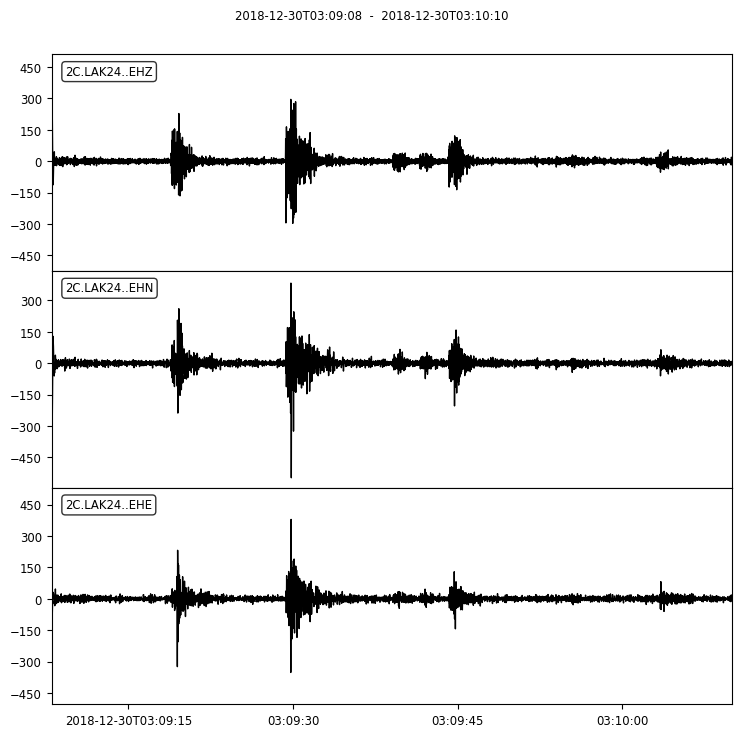

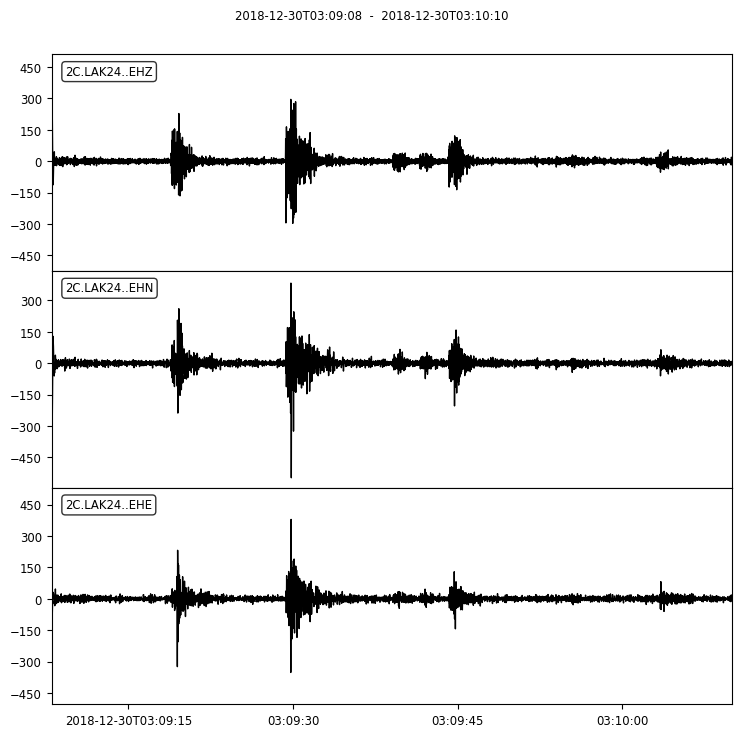

In [2]:
# read seismic data and plot
stream = read("./example_data_2/*")
st = stream.copy().filter('bandpass', freqmin=5, freqmax=45)
st.plot()

In [3]:
# apply quakephase to pick P and S wave
output = quakephase.apply(stream, file_para='./parameters.yaml')

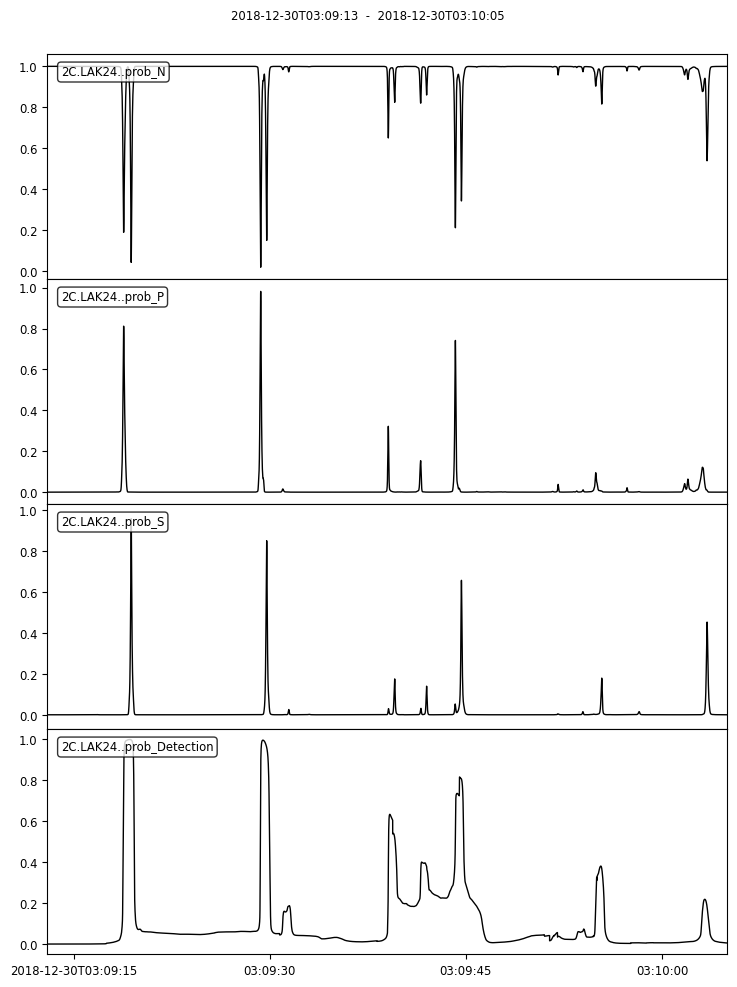

     trace_id                   start_time                     end_time  \
0   2C.LAK24.  2018-12-30T03:09:18.688000Z  2018-12-30T03:09:19.008000Z   
1   2C.LAK24.  2018-12-30T03:09:19.274000Z  2018-12-30T03:09:19.556000Z   
2   2C.LAK24.  2018-12-30T03:09:29.182000Z  2018-12-30T03:09:29.442000Z   
3   2C.LAK24.  2018-12-30T03:09:29.642000Z  2018-12-30T03:09:29.904000Z   
4   2C.LAK24.  2018-12-30T03:09:39.006000Z  2018-12-30T03:09:39.114000Z   
5   2C.LAK24.  2018-12-30T03:09:39.506000Z  2018-12-30T03:09:39.588000Z   
6   2C.LAK24.  2018-12-30T03:09:41.486000Z  2018-12-30T03:09:41.570000Z   
7   2C.LAK24.  2018-12-30T03:09:41.968000Z  2018-12-30T03:09:42.024000Z   
8   2C.LAK24.  2018-12-30T03:09:44.084000Z  2018-12-30T03:09:44.288000Z   
9   2C.LAK24.  2018-12-30T03:09:44.554000Z  2018-12-30T03:09:44.768000Z   
10  2C.LAK24.  2018-12-30T03:09:55.340000Z  2018-12-30T03:09:55.428000Z   
11  2C.LAK24.  2018-12-30T03:10:03.024000Z  2018-12-30T03:10:03.172000Z   
12  2C.LAK24.  2018-12-30

In [4]:
# print the pick and probability
output['prob'].plot()
print(output['pick'])
output['pick'].to_csv('pick.csv', index=False)

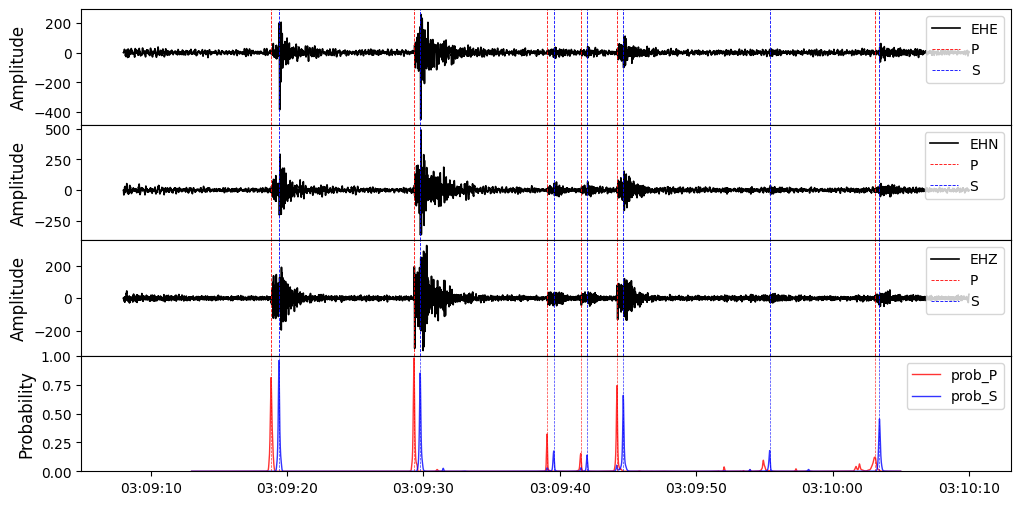

In [5]:
# visualize together with phase picks and probabilities
waveform_pick_1sta(stream=stream, pick=output['pick'], prob=output['prob'], fband=[2, 40])